**Predictive modeling process for car evaluation**

1. Data Loading and preparation:

The car evaluation dataset was loaded into a pandas DataFrame. I then extracted the features and the target variable. 
I do not need to do the normalization since all the input variable has the same scale. However, I build model based on 2 set of input data which are numerical and categorical data. 

For categorical input, I used one-hot encoding since the unique value for each variables is less than 4 so that the calculation for one-hot encoding is not that complicated. 

For numerical input, I used ordinal number represent each value for each variables. 

I also checked is there any missing value, and finish the process and data preparation. 

2. Data Splitting:

The dataset was split into training and testing sets in a 70-30. 
Since I applied nested validation in this model development, 
This allows me to train the models on the training data, fine-tune hyperparameters using the validation data, and finally evaluate the model's performance on the test data.

3. Model Building and Evaluation:

For the car evaluation problem, classification algorithms like Decision Trees, Logistic Regression, k-NN, SVM, and Naive Bayes were considered. 

3.1. Hyperparameter selection and model selection:

In each model, I did nested cv, techniques like grid search were used in conjunction with nested cross-validation. This approach ensured unbiased evaluation and determined the best hyperparameters for the models. 

**I use line chart to visualize performance on different hyperparameter for all model except SVM because in SVM we have multiple hyperparameter so I would like just show it**

With different hyperparameter: maxdepth in decision tree, k value in the kNN model, and c value in Logistic regression, kernel and C in SVM then finalized the optimal hyperparameter to get highest performance on traning data but ensure not commmit overfitting by comparing with performance on validation dataset. After that, I would like to check the robust of the model by using cross-validation to check whether my model work well on the unseen data. 

3.2. Evaluation 

After hyperparameter finalization, I used different performance metric to evaluate the model, accuracy, precision, recall and f-measure on testing data in order to compare models together. Since we have 4 different classes in dataset, so in each class I would like to pick the most optimal model.

4. Conclusion and recommendation

I would like to inteprete the result of the model in order to see what are the most influential factors on the car evaluation based on the feature importance and give recommendation accordingly. 

**Should you treat them as numeric or  categorical? (What are pros and cons?)**

**Treating Ordinal Variables as Numeric:**

Pros:\
***Natural Order:*** By treating ordinal variables as numeric, their inherent order is preserved. This is particularly useful for algorithms that can leverage this order information.\
***Simplicity:*** It simplifies the data representation, especially if there are many levels in the ordinal variable. Instead of having multiple dummy columns.\
***Model Interpretability:*** In some models, like linear regression, numeric encoding can lead to easier interpretability. The coefficient of the ordinal variable can provide insights into how each increase in level affects the target.

Cons:\
***Assumed Equal Distances:*** Numeric encoding might imply that the distances between consecutive levels are equal, which might not always be the case.\
***Potential for Misinterpretation:*** Some algorithms might misinterpret the nature of the ordinal variable and assume it to be continuous than ordinal data

**Treating Ordinal Variables as Categorical:**

Pros:\
***No Assumed Distances:*** By treating ordinal variables as categorical and using techniques like one-hot encoding, there's no assumption about the distances between different levels.

***Flexibility:*** It allows models to capture non-linear relationships between the ordinal variable and the target, which might be missed if the variable is treated as numeric.

Cons:\
***Increased Dimensionality:*** One-hot encoding can lead to a high number of columns, especially if the ordinal variable has many levels. This can increase the computation time and complexity.
Loss of Order Information: By converting the ordinal variable to a categorical one, the inherent order might be lost, which could be valuable information for the model.


**In the context of the car evaluation dataset, the input variables are indeed ordinal. Given their nature, it might make sense to treat them as numeric, especially if using models that can benefit from the inherent order of the variables. However, I will build model for both 2 kinds dataset of input to see which is the most optimal give the final conclusion in the later part**




In [45]:
import pandas as pd


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Load the dataset
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
car_data = pd.read_csv("car.data", header=None, names=column_names)

# Display the first few rows of the dataset
car_data.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:


# Check for missing values
missing_values = car_data.isnull().sum()

# Check the distribution of the target variable
class_distribution = car_data["class"].value_counts(normalize=True)

print(missing_values)
print(class_distribution)


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
car_data_label_encoded = car_data.copy()

for column in car_data.columns:
    le = LabelEncoder()
    car_data_label_encoded[column] = le.fit_transform(car_data[column])
    label_encoders[column] = le
    


In [34]:
# Combining the encoded features and target into a single DataFrame
car_data_encoded = pd.concat([features_one_hot_encoded, pd.Series(target_encoded, name='class_encoded')], axis=1)
car_data_ordinal["class"] = car_data["class"].map(ordinal_mapping)


In [5]:
# Ordinal Encoding for the target variable 'class'
ordinal_mapping = {'unacc': 1, 'acc': 2, 'good': 3, 'vgood': 4}
car_data_ordinal = car_data.copy()
car_data_ordinal["class"] = car_data["class"].map(ordinal_mapping)
# Ordinal encoding for features
ordinal_mappings_features = [
    {'col': 'buying', 'mapping': {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}},
    {'col': 'maint', 'mapping': {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}},
    {'col': 'doors', 'mapping': {'2': 1, '3': 2, '4': 3, '5more': 4}},
    {'col': 'persons', 'mapping': {'2': 1, '4': 2, 'more': 3}},
    {'col': 'lug_boot', 'mapping': {'small': 1, 'med': 2, 'big': 3}},
    {'col': 'safety', 'mapping': {'low': 1, 'med': 2, 'high': 3}},
]


# Applying ordinal encoding to features
for mapping in ordinal_mappings_features:
    col = mapping['col']
    car_data_ordinal[col] = car_data_ordinal[col].replace(mapping['mapping'])

car_data_ordinal["class"].unique()

array([1, 2, 4, 3])

In [9]:
# Splitting the encoded data
X_car = car_data_ordinal.drop(columns='class')
y_car = car_data_ordinal['class']
X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(X_car, y_car, test_size=0.3, random_state=14)
X_car_train.head()

,buying,maint,doors,persons,lug_boot,safety
118,4,3,1,2,1,2
945,2,4,4,1,1,1
1689,1,1,3,2,3,1
343,4,1,1,3,1,2
978,2,3,1,1,3,1


In [13]:
car_data_encoded = car_data.copy()

In [37]:
features = car_data.drop(columns=['class'])

target = car_data['class']

# One-hot encoding the feature columns
features_one_hot_encoded = pd.get_dummies(features, drop_first=True)

# Label encoding the target column
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Combining the encoded features and target into a single DataFrame
ordinal_mapping = {'unacc': 1, 'acc': 2, 'good': 3, 'vgood': 4}
car_data_encoded['class_encoded'] = car_data['class'].map(ordinal_mapping)

car_data_encoded.class_encoded.unique()


array([1, 2, 4, 3])

In [18]:
# Combining the encoded features and target into a single DataFrame
car_data_encoded = pd.concat([features_one_hot_encoded, pd.Series(target_encoded, name='class_encoded')], axis=1)



In [39]:

# Splitting the encoded dataset into train and test sets
X_car_encode = car_data_encoded.drop(columns='class_encoded')
y_car_encode = car_data_encoded['class_encoded']

X_car_train_encode, X_car_test_encode, y_car_train_encode, y_car_test_encode = train_test_split(X_car_encode, y_car_encode, test_size=0.3, random_state=14)
X_car_train_encode.head()


,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
118,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
945,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0
1689,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
343,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1
978,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [121]:
# Ordinal Encoding for the target variable 'class'
bin_mapping = {'unacc': 0, 'acc': 1, 'good': 1, 'vgood': 1}
car_data_bin = car_data.copy()
car_data_bin ["class_bin"] = car_data["class"].map(bin_mapping)
# Ordinal encoding for features
ordinal_mappings_features = [
    {'col': 'buying', 'mapping': {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}},
    {'col': 'maint', 'mapping': {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}},
    {'col': 'doors', 'mapping': {'2': 1, '3': 2, '4': 3, '5more': 4}},
    {'col': 'persons', 'mapping': {'2': 1, '4': 2, 'more': 3}},
    {'col': 'lug_boot', 'mapping': {'small': 1, 'med': 2, 'big': 3}},
    {'col': 'safety', 'mapping': {'low': 1, 'med': 2, 'high': 3}},
]


# Applying ordinal encoding to features
for mapping in ordinal_mappings_features:
    col = mapping['col']
    car_data_bin[col] = car_data_bin[col].replace(mapping['mapping'])

car_data_bin["class_bin"].unique()

array([0, 1])

In [136]:
X_car_bin = car_data_bin.drop(columns = ['class','binary_class','class_bin'])
y_car_binary = car_data_bin['class_bin']
X_car_train_bin, X_car_test_bin, y_car_train_bin, y_car_test_bin = train_test_split(X_car_bin, y_car_binary, test_size=0.3, random_state=14)


,buying,maint,doors,persons,lug_boot,safety
118,4,3,1,2,1,2
945,2,4,4,1,1,1
1689,1,1,3,2,3,1
343,4,1,1,3,1,2
978,2,3,1,1,3,1


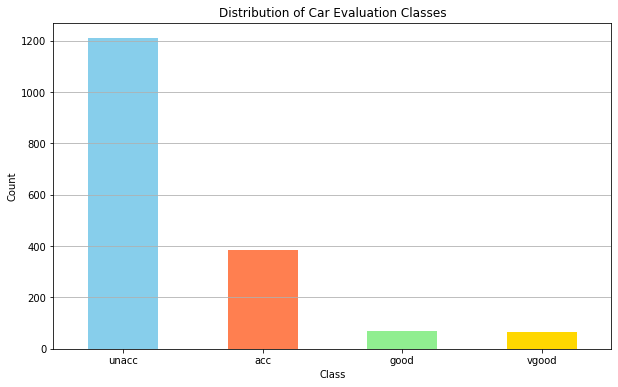

In [61]:
# Plotting the distribution of the 'class' variable
plt.figure(figsize=(10, 6))
car_data["class"].value_counts().plot(kind='bar', color=['skyblue', 'coral', 'lightgreen', 'gold'])
plt.title('Distribution of Car Evaluation Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


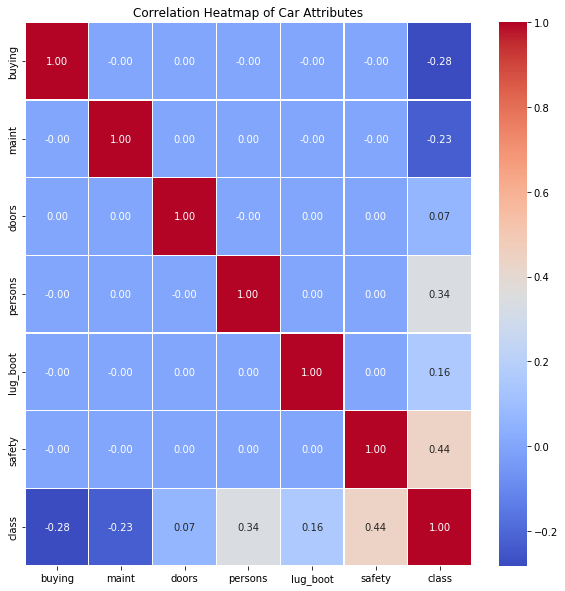

In [70]:
correlation_matrix = car_data_ordinal.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.2)
plt.title("Correlation Heatmap of Car Attributes")
plt.ylim(len(correlation_matrix), 0)  # Adjusting the y-axis limits
plt.show()

**I will discussion correlation matrix in later exploration section**

**Model Development**

**Decision tree with categorical input**

In [47]:


from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# I will try maximum depths from 1 to 20
complexity_values = range(1,20)

# Parameters to be tuned
param_grid = {'max_depth': list(complexity_values)}

# Initialize the classifier
clf = tree.DecisionTreeClassifier(criterion="gini")

# Inner loop: hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Outer loop: cross-validation of the best model
nested_scores = cross_val_score(grid_search, X_car_train_encode, y_car_train_encode, cv=5)

nested_scores_mean = nested_scores.mean()
nested_scores_std = nested_scores.std()

nested_scores_mean, nested_scores_std


(0.8898694944700078, 0.02343802133705473)

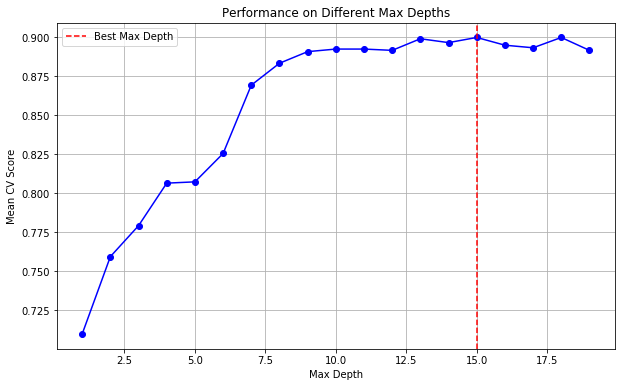

In [50]:
grid_search.fit(X_car_train_encode, y_car_train_encode)
mean_test_scores = grid_search.cv_results_['mean_test_score']
best_max_depth = grid_search.best_params_["max_depth"]

# Visualizing the performance
plt.figure(figsize=(10, 6))
plt.plot(complexity_values, mean_test_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Max Depth")
plt.ylabel("Mean CV Score")
plt.title("Performance on Different Max Depths")
plt.axvline(x=grid_search.best_params_['max_depth'], color='r', linestyle='--', label='Best Max Depth')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf_best_cat = tree.DecisionTreeClassifier(criterion="gini", max_depth=best_max_depth)
clf_best_cat.fit(X_car_train_encode, y_car_train_encode)

# Making predictions on the test data
y_pred = clf_best_cat.predict(X_car_test_encode)

# Calculating the performance metrics
# Classification report
dt_bin_class_report = classification_report(y_car_test_encode, y_pred)

print(dt_bin_class_report)

              precision    recall  f1-score   support

           1       0.93      0.97      0.95       352
           2       0.87      0.77      0.82       128
           3       0.65      0.81      0.72        21
           4       1.00      0.61      0.76        18

    accuracy                           0.91       519
   macro avg       0.86      0.79      0.81       519
weighted avg       0.91      0.91      0.90       519



**Decision tree with numerical input**

In [233]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Parameters to be tuned
param_grid = {'max_depth': list(complexity_values)}

# Initialize the classifier
clf = tree.DecisionTreeClassifier(criterion="gini")

# Inner loop: hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Outer loop: cross-validation of the best model
nested_scores = cross_val_score(grid_search, X_car_train , y_car_train , cv=5)

nested_scores_mean = nested_scores.mean()
nested_scores_std = nested_scores.std()

nested_scores_mean, nested_scores_std


(0.9694475666863479, 0.009861971515091206)

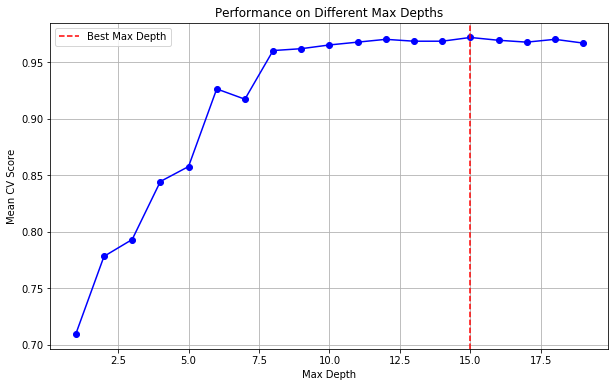

In [234]:
grid_search.fit(X_car_train, y_car_train)
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Visualizing the performance
plt.figure(figsize=(10, 6))
plt.plot(complexity_values, mean_test_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Max Depth")
plt.ylabel("Mean CV Score")
plt.title("Performance on Different Max Depths")
plt.axvline(x=grid_search.best_params_['max_depth'], color='r', linestyle='--', label='Best Max Depth')
plt.legend()
plt.grid(True)
plt.show()

In [225]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=best_max_depth)
clf.fit(X_car_train , y_car_train )

# Making predictions on the test data
y_pred = clf.predict(X_car_test )

# Calculating the performance metrics
# Classification report
dt_bin_class_report = classification_report(y_car_test , y_pred)

print(dt_bin_class_report)

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       352
           2       0.96      0.94      0.95       128
           3       0.75      0.71      0.73        21
           4       0.86      1.00      0.92        18

    accuracy                           0.97       519
   macro avg       0.89      0.91      0.90       519
weighted avg       0.97      0.97      0.97       519



**Logistic Regression**

**Logistic Regression with categorical variable**

In [241]:
# Setting the hyperparameters for tuning with the specified values of C and solver
logreg = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],           # newton-cg only supports l2
    'solver': ['newton-cg']
}

inner_cv = KFold(n_splits=5, shuffle=True, random_state=14)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=14)

# Inner loop: hyperparameter tuning using GridSearchCV
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=inner_cv, scoring='accuracy')

# Outer loop: cross-validation of the best model
nested_scores_newton_cg = cross_val_score(grid_search_logreg, X_car_train_encode, y_car_train_encode, cv=outer_cv)

nested_scores_mean_newton_cg = nested_scores_newton_cg.mean()
nested_scores_std_newton_cg = nested_scores_newton_cg.std()

nested_scores_mean_newton_cg, nested_scores_std_newton_cg


(0.8932924110970131, 0.016868617091446728)

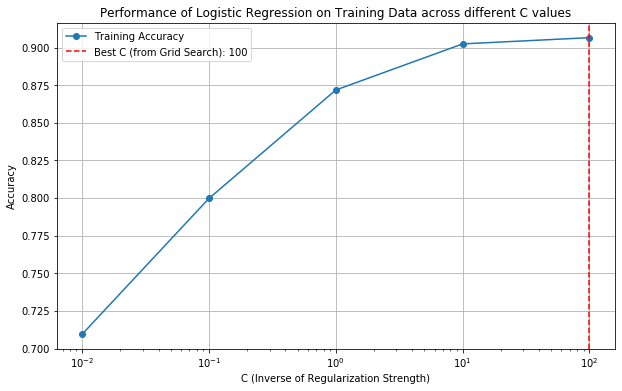

In [248]:
# List of C values to test
C_values = [0.01, 0.1, 1, 10, 100]

# Lists to store performance metrics
train_accuracies = []

for C in C_values:
    logreg_temp = LogisticRegression(solver='newton-cg', C=C, penalty='l2')
    logreg_temp.fit(X_car_train_encode, y_car_train_encode)
    
    train_accuracies.append(logreg_temp.score(X_car_train_encode, y_car_train_encode))

    
    
# Highlighting the best C value obtained from the grid search on the plot
plt.figure(figsize=(10,6))
plt.plot(C_values, train_accuracies, marker='o', label='Training Accuracy')
plt.axvline(x=grid_search_logreg.best_params_['C'], color='r', linestyle='--', label=f'Best C (from Grid Search): {grid_search_logreg.best_params_["C"]}')
plt.xscale('log')  # Since C values span several orders of magnitude
plt.xlabel("C (Inverse of Regularization Strength)")
plt.ylabel("Accuracy")
plt.title("Performance of Logistic Regression on Training Data across different C values")
plt.legend()
plt.grid(True)
plt.show()


In [240]:
from sklearn.metrics import classification_report

grid_search_logreg.fit(X_car_train_encode, y_car_train_encode)
logreg_best = LogisticRegression(solver='newton-cg', C=grid_search_logreg.best_params_['C'], penalty='l2')
logreg_best.fit(X_car_train_encode, y_car_train_encode )

# Making predictions on the test data
y_pred_newton_cg = logreg_best.predict(X_car_test_encode)



log_bin_class_report = classification_report(y_car_test_encode, y_pred_newton_cg)

print(log_bin_class_report)



              precision    recall  f1-score   support

           1       0.98      0.97      0.97       352
           2       0.80      0.87      0.83       128
           3       0.40      0.19      0.26        21
           4       0.75      0.83      0.79        18

    accuracy                           0.91       519
   macro avg       0.73      0.72      0.71       519
weighted avg       0.90      0.91      0.90       519



**Logistic Regression with numerical variable**

In [249]:
# Setting the hyperparameters for tuning with the specified values of C and solver
logreg = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],           # newton-cg only supports l2
    'solver': ['newton-cg']
}

inner_cv = KFold(n_splits=5, shuffle=True, random_state=14)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=14)

# Inner loop: hyperparameter tuning using GridSearchCV
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=inner_cv, scoring='accuracy')

# Outer loop: cross-validation of the best model
nested_scores_newton_cg = cross_val_score(grid_search_logreg, X_car_train, y_car_train, cv=outer_cv)

nested_scores_mean_newton_cg = nested_scores_newton_cg.mean()
nested_scores_std_newton_cg = nested_scores_newton_cg.std()

nested_scores_mean_newton_cg, nested_scores_std_newton_cg


(0.807256266931861, 0.0392911383678596)

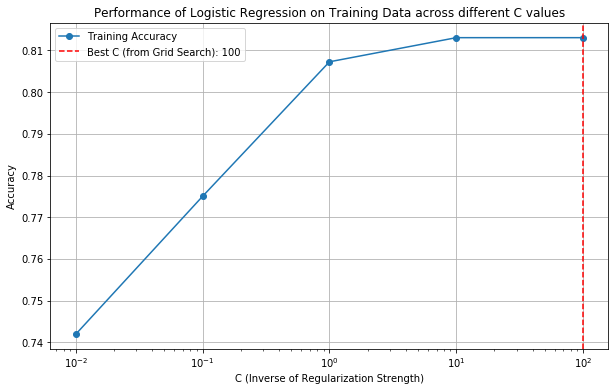

In [253]:
# List of C values to test
C_values = [0.01, 0.1, 1, 10, 100]

# Lists to store performance metrics
train_accuracies = []

for C in C_values:
    logreg_temp = LogisticRegression(solver='newton-cg', C=C, penalty='l2')
    logreg_temp.fit(X_car_train, y_car_train)
    
    train_accuracies.append(logreg_temp.score(X_car_train, y_car_train))


grid_search_logreg.fit(X_car_train, y_car_train)
    
# Highlighting the best C value obtained from the grid search on the plot
plt.figure(figsize=(10,6))
plt.plot(C_values, train_accuracies, marker='o', label='Training Accuracy')
plt.axvline(x=grid_search_logreg.best_params_['C'], color='r', linestyle='--', label=f'Best C (from Grid Search): {grid_search_logreg.best_params_["C"]}')
plt.xscale('log')  # Since C values span several orders of magnitude
plt.xlabel("C (Inverse of Regularization Strength)")
plt.ylabel("Accuracy")
plt.title("Performance of Logistic Regression on Training Data across different C values")
plt.legend()
plt.grid(True)
plt.show()


In [254]:
from sklearn.metrics import classification_report

grid_search_logreg.fit(X_car_train_encode, y_car_train_encode)
logreg_best = LogisticRegression(solver='newton-cg', C=grid_search_logreg.best_params_['C'], penalty='l2')
logreg_best.fit(X_car_train, y_car_train )

# Making predictions on the test data
y_pred_newton_cg = logreg_best.predict(X_car_test)



log_bin_class_report = classification_report(y_car_test, y_pred_newton_cg)

print(log_bin_class_report)



              precision    recall  f1-score   support

           1       0.83      0.96      0.89       352
           2       0.66      0.46      0.54       128
           3       0.83      0.24      0.37        21
           4       0.85      0.61      0.71        18

    accuracy                           0.80       519
   macro avg       0.79      0.57      0.63       519
weighted avg       0.79      0.80      0.78       519



**KNN**

**KNN model with categorical variable**

In [42]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
# Reducing the number of k values to speed up the process
knn = KNeighborsClassifier()
param_grid_knn_reduced = {'n_neighbors': list(range(1, 20))}

inner_cv = KFold(n_splits=5, shuffle=True, random_state=14)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=14)

# Inner loop: hyperparameter tuning using GridSearchCV
grid_search_knn_reduced = GridSearchCV(knn, param_grid_knn_reduced, cv=inner_cv, scoring='accuracy', n_jobs=-1)

# Outer loop: cross-validation of the best model
nested_scores_knn_reduced = cross_val_score(grid_search_knn_reduced, X_car_train_encode, y_car_train_encode , cv=outer_cv, n_jobs=-1)

# Mean and std of nested cross-validation scores
nested_scores_knn_reduced_mean = nested_scores_knn_reduced.mean()
nested_scores_knn_reduced_std = nested_scores_knn_reduced.std()

nested_scores_knn_reduced_mean, nested_scores_knn_reduced_std


(0.812211515380131, 0.029048975841266905)

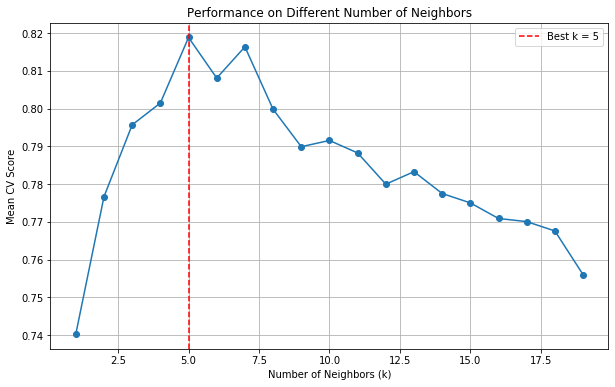

              precision    recall  f1-score   support

           1       0.86      0.97      0.91       352
           2       0.77      0.64      0.70       128
           3       0.46      0.29      0.35        21
           4       0.50      0.06      0.10        18

    accuracy                           0.83       519
   macro avg       0.65      0.49      0.52       519
weighted avg       0.81      0.83      0.81       519



In [43]:
from sklearn.metrics import classification_report

# Train k-NN using the best parameters obtained from GridSearchCV on the entire training set
grid_search_knn_reduced.fit(X_car_train_encode, y_car_train_encode)
knn_best = grid_search_knn_reduced.best_estimator_

# Predictions on the test set
y_car_pred_knn = knn_best.predict(X_car_test_encode)

mean_test_scores = grid_search_knn_reduced.cv_results_['mean_test_score']
best_k = knn_best.get_params()['n_neighbors']

plt.figure(figsize=(10, 6))
plt.plot(list(range(1, 20)), mean_test_scores, marker='o', linestyle='-')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean CV Score')
plt.title('Performance on Different Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()


# Classification report
knn_class_report = classification_report(y_car_test_encode, y_car_pred_knn)

print(knn_class_report)


**KNN model with numerical variable**

In [25]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
knn = KNeighborsClassifier()
# Reducing the number of k values to speed up the process
param_grid_knn_reduced = {'n_neighbors': list(range(1, 20))}

inner_cv = KFold(n_splits=5, shuffle=True, random_state=14)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=14)

# Inner loop: hyperparameter tuning using GridSearchCV
grid_search_knn_reduced = GridSearchCV(knn, param_grid_knn_reduced, cv=inner_cv, scoring='accuracy', n_jobs=-1)

# Outer loop: cross-validation of the best model
nested_scores_knn_reduced = cross_val_score(grid_search_knn_reduced, X_car_train , y_car_train  , cv=outer_cv, n_jobs=-1)

# Mean and std of nested cross-validation scores
nested_scores_knn_reduced_mean = nested_scores_knn_reduced.mean()
nested_scores_knn_reduced_std = nested_scores_knn_reduced.std()

nested_scores_knn_reduced_mean, nested_scores_knn_reduced_std

(0.9189293919961592, 0.010752737706445324)

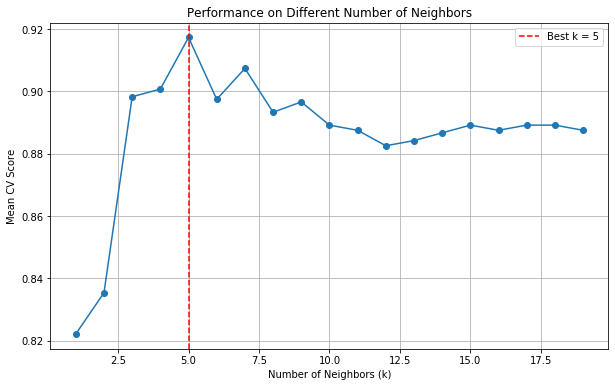

              precision    recall  f1-score   support

           1       0.93      1.00      0.96       352
           2       0.91      0.80      0.85       128
           3       1.00      0.67      0.80        21
           4       0.94      0.83      0.88        18

    accuracy                           0.93       519
   macro avg       0.95      0.83      0.88       519
weighted avg       0.93      0.93      0.93       519



In [28]:
from sklearn.metrics import classification_report

# Train k-NN using the best parameters obtained from GridSearchCV on the entire training set
grid_search_knn_reduced.fit(X_car_train , y_car_train )
knn_best = grid_search_knn_reduced.best_estimator_

# Predictions on the test set
y_car_pred_knn = knn_best.predict(X_car_test )

mean_test_scores = grid_search_knn_reduced.cv_results_['mean_test_score']
best_k = knn_best.get_params()['n_neighbors']

plt.figure(figsize=(10, 6))
plt.plot(list(range(1, 20)), mean_test_scores, marker='o', linestyle='-')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean CV Score')
plt.title('Performance on Different Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

# Classification report
knn_class_report = classification_report(y_car_test , y_car_pred_knn)

print(knn_class_report)


**Naive Bayes**

**NB with numerical input**

In [282]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# Setting the hyperparameters for tuning with var_smoothing values
nb = GaussianNB()

param_grid_nb = {
    'var_smoothing': np.logspace(-9, 0, 10)
}

inner_cv = KFold(n_splits=5, shuffle=True, random_state=14)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=14)

# Inner loop: hyperparameter tuning using GridSearchCV
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=inner_cv, scoring='accuracy')

# Outer loop: cross-validation of the best model
nested_scores_nb = cross_val_score(grid_search_nb, X_car_train, y_car_train, cv=outer_cv)

nested_scores_mean_nb = nested_scores_nb.mean()
nested_scores_std_nb = nested_scores_nb.std()

nested_scores_mean_nb, nested_scores_std_nb


(0.8204896951407703, 0.034866485703131465)

In [284]:
grid_search_nb.fit(X_car_train, y_car_train)
best_var_smoothing = grid_search_nb.best_params_['var_smoothing']
nb_best = GaussianNB(var_smoothing=best_var_smoothing)
nb_best.fit(X_car_train, y_car_train)

# Make predictions on the test data
y_pred = nb_best.predict(X_car_test)

# Generate the classification report
class_report = classification_report(y_car_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           1       0.83      0.95      0.89       352
           2       0.70      0.44      0.54       128
           3       0.55      0.29      0.37        21
           4       0.75      1.00      0.86        18

    accuracy                           0.80       519
   macro avg       0.71      0.67      0.66       519
weighted avg       0.78      0.80      0.78       519



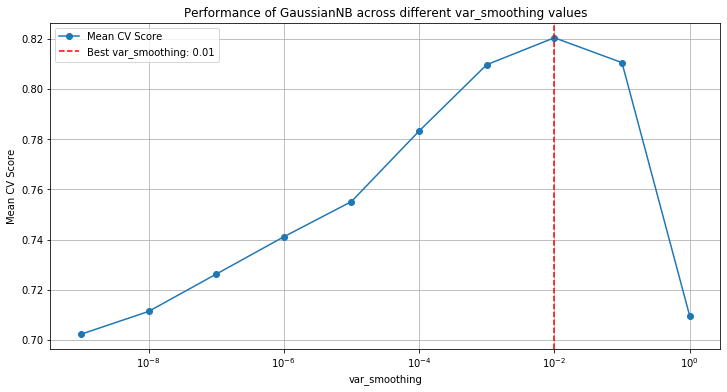

In [286]:
# Fitting the GridSearchCV to get cross-validation results
grid_search_nb.fit(X_car_train, y_car_train)

# Extracting mean test scores and standard deviations
mean_test_scores = grid_search_nb.cv_results_['mean_test_score']
std_test_scores = grid_search_nb.cv_results_['std_test_score']

# Plotting the mean test scores
plt.figure(figsize=(12, 6))
plt.plot(param_grid_nb['var_smoothing'], mean_test_scores, marker='o', label='Mean CV Score')


# Highlighting the best var_smoothing value
best_var_smoothing_value = grid_search_nb.best_params_['var_smoothing']
plt.axvline(x=best_var_smoothing_value, color='red', linestyle='--', label=f'Best var_smoothing: {best_var_smoothing_value}')

# Setting x-axis to log scale since var_smoothing values span several orders of magnitude
plt.xscale('log')

# Adding labels, title, legend, and grid
plt.xlabel('var_smoothing')
plt.ylabel('Mean CV Score')
plt.title('Performance of GaussianNB across different var_smoothing values')
plt.legend()
plt.grid(True)
plt.show()


**NB with categorical input**

In [287]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# Setting the hyperparameters for tuning with var_smoothing values
nb = GaussianNB()

param_grid_nb = {
    'var_smoothing': np.logspace(-9, 0, 10)
}

inner_cv = KFold(n_splits=5, shuffle=True, random_state=14)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=14)

# Inner loop: hyperparameter tuning using GridSearchCV
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=inner_cv, scoring='accuracy')

# Outer loop: cross-validation of the best model
nested_scores_nb = cross_val_score(grid_search_nb, X_car_train_encode, y_car_train_encode, cv=outer_cv)

nested_scores_mean_nb = nested_scores_nb.mean()
nested_scores_std_nb = nested_scores_nb.std()

nested_scores_mean_nb, nested_scores_std_nb


(0.7345015603031446, 0.038905845705956905)

In [289]:
grid_search_nb.fit(X_car_train_encode, y_car_train_encode)
best_var_smoothing = grid_search_nb.best_params_['var_smoothing']
nb_best = GaussianNB(var_smoothing=best_var_smoothing)
nb_best.fit(X_car_train_encode, y_car_train_encode)

# Make predictions on the test_encode data
y_pred = nb_best.predict(X_car_test_encode)

# Generate the classification report
class_report = classification_report(y_car_test_encode, y_pred)
print(class_report)

              precision    recall  f1-score   support

           1       0.71      1.00      0.83       352
           2       0.76      0.10      0.18       128
           3       0.67      0.10      0.17        21
           4       1.00      0.17      0.29        18

    accuracy                           0.71       519
   macro avg       0.79      0.34      0.37       519
weighted avg       0.73      0.71      0.62       519



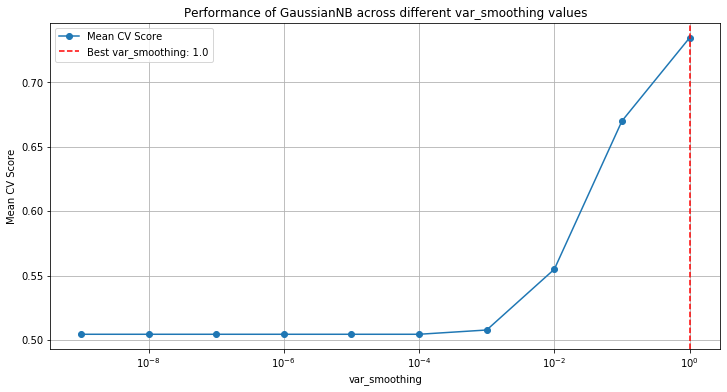

In [290]:
# Fitting the GridSearchCV to get cross-validation results
grid_search_nb.fit(X_car_train_encode, y_car_train_encode)

# Extracting mean test scores and standard deviations
mean_test_scores = grid_search_nb.cv_results_['mean_test_score']
std_test_scores = grid_search_nb.cv_results_['std_test_score']

# Plotting the mean test scores
plt.figure(figsize=(12, 6))
plt.plot(param_grid_nb['var_smoothing'], mean_test_scores, marker='o', label='Mean CV Score')


# Highlighting the best var_smoothing value
best_var_smoothing_value = grid_search_nb.best_params_['var_smoothing']
plt.axvline(x=best_var_smoothing_value, color='red', linestyle='--', label=f'Best var_smoothing: {best_var_smoothing_value}')

# Setting x-axis to log scale since var_smoothing values span several orders of magnitude
plt.xscale('log')

# Adding labels, title, legend, and grid
plt.xlabel('var_smoothing')
plt.ylabel('Mean CV Score')
plt.title('Performance of GaussianNB across different var_smoothing values')
plt.legend()
plt.grid(True)
plt.show()


**SVM with numerical variable**

In [81]:
from sklearn.svm import SVC


from sklearn.metrics import mean_squared_error, r2_score


tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['neg_mean_squared_error', 'r2']
results = {}

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    reg_svm = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring=score)
    reg_svm.fit(X_car_train, y_car_train)

    print("Best parameters set found on development set:")
    print()
    print(reg_svm.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = reg_svm.cv_results_['mean_test_score']
    stds = reg_svm.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, reg_svm.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed regression report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true_reg, y_pred_reg = y_car_test, reg_svm.predict(X_car_test)
    print("Mean Squared Error: ", mean_squared_error(y_true_reg, y_pred_reg))
    print("R^2: ", r2_score(y_true_reg, y_pred_reg))
    print()

    print(classification_report(y_true_reg, y_pred_reg))
    print()



# Tuning hyper-parameters for neg_mean_squared_error

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

-0.720 (+/-0.042) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-0.720 (+/-0.042) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.384 (+/-0.053) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
-0.720 (+/-0.042) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.241 (+/-0.055) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
-0.385 (+/-0.052) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.216 (+/-0.084) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
-0.252 (+/-0.061) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.256 (+/-0.084) for {'C': 1, 'kernel': 'linear'}
-0.267 (+/-0.063) for {'C': 10, 'kernel': 'linear'}
-0.266 (+/-0.113) for {'C': 100, 'kernel': 'linear'}
-0.259 (+/-0.099) for {'C': 1000, 'kernel': 'linear'}

Detailed regression report:

The model is trained on the full development set.
Th

**SVM with categorical variable**

In [40]:
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error, r2_score


tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['neg_mean_squared_error', 'r2']
results = {}

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    reg_svm = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring=score)
    reg_svm.fit(X_car_train_encode, y_car_train_encode)

    print("Best parameters set found on development set:")
    print()
    print(reg_svm.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = reg_svm.cv_results_['mean_test_score']
    stds = reg_svm.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, reg_svm.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed regression report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true_reg, y_pred_reg = y_car_test_encode, reg_svm.predict(X_car_test_encode)
    print("Mean Squared Error: ", mean_squared_error(y_true_reg, y_pred_reg))
    print("R^2: ", r2_score(y_true_reg, y_pred_reg))
    print()

    print(classification_report(y_true_reg, y_pred_reg))
    print()


# Tuning hyper-parameters for neg_mean_squared_error

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

-0.720 (+/-0.042) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-0.720 (+/-0.042) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.720 (+/-0.042) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
-0.720 (+/-0.042) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.194 (+/-0.075) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
-0.720 (+/-0.042) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.100 (+/-0.031) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
-0.190 (+/-0.063) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.122 (+/-0.041) for {'C': 1, 'kernel': 'linear'}
-0.085 (+/-0.015) for {'C': 10, 'kernel': 'linear'}
-0.093 (+/-0.032) for {'C': 100, 'kernel': 'linear'}
-0.094 (+/-0.041) for {'C': 1000, 'kernel': 'linear'}

Detailed regression report:

The model is trained on the full development set.
The scores are co

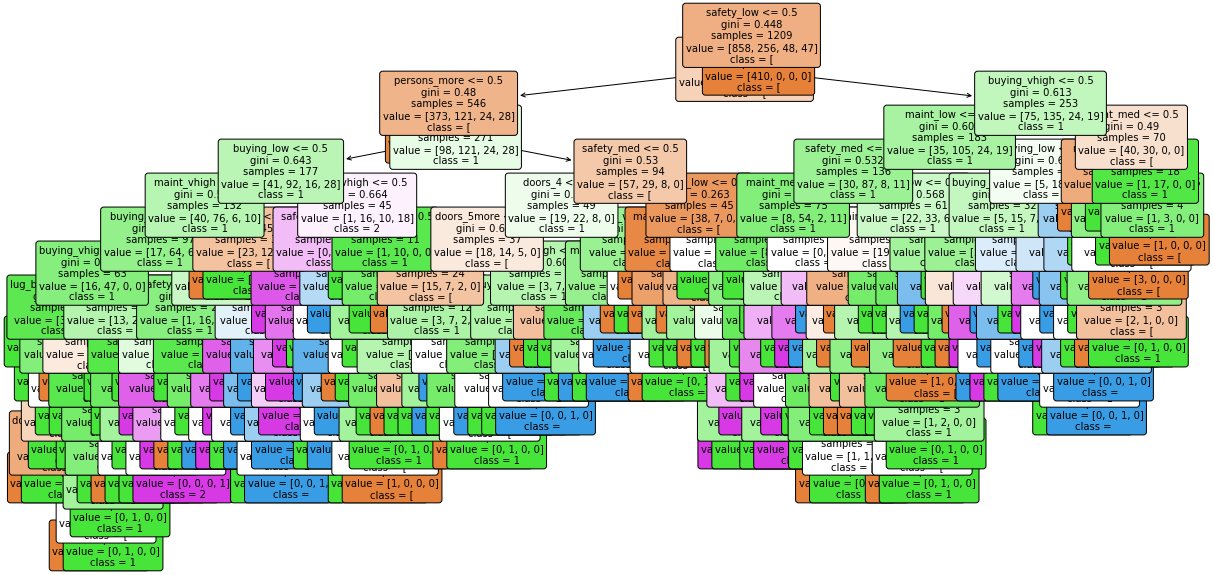

In [58]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(clf_best_cat, filled=True, feature_names=X_car_train_encode.columns, class_names=str(clf_best_cat.classes_), rounded=True, fontsize=10)
plt.show()

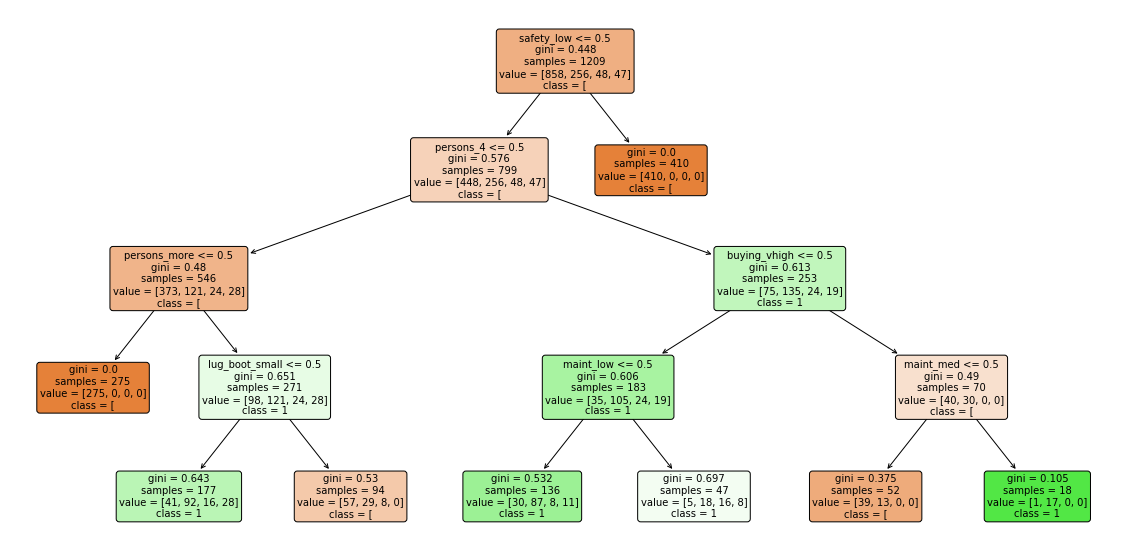

In [60]:
clf_best_simple = tree.DecisionTreeClassifier(criterion="gini", max_depth=4)
clf_best_simple.fit(X_car_train_encode, y_car_train_encode)
plt.figure(figsize=(20, 10))
plot_tree(clf_best_simple, filled=True, feature_names=X_car_train_encode.columns, class_names=str(clf_best_simple.classes_), rounded=True, fontsize=10)
plt.show()

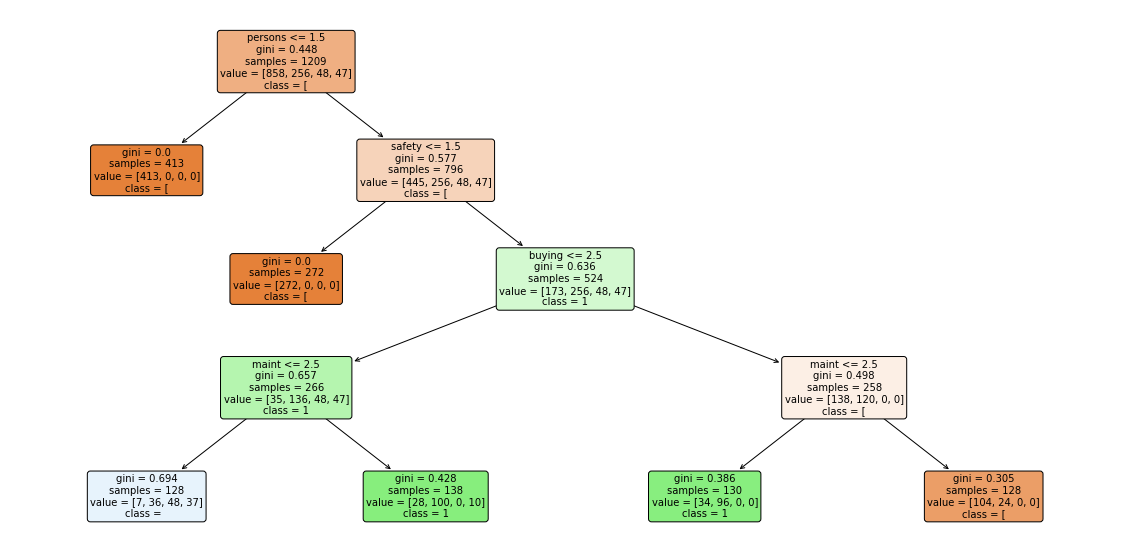

In [84]:
clf_best_simple = tree.DecisionTreeClassifier(criterion="gini", max_depth=4)
clf_best_simple.fit(X_car_train , y_car_train )
plt.figure(figsize=(20, 10))
plot_tree(clf_best_simple, filled=True, feature_names=X_car_train .columns, class_names=str(clf_best_simple.classes_), rounded=True, fontsize=10)
plt.show()

**Conclusion:**

**Best F1 score for each class**
***Numerical Input:*** \
Class unacc:     99% (Decision Tree)\
Class acc:       95% (Decision Tree)\
Class good:      79% (SVM)\
Class very good: 92% (Decision Tree)
    
    
***Categorical Input:***     
Class unacc:     98% (SVM)\
Class acc:       90% (SVM)\
Class good:      81% (Decision Tree)\
Class very good: 89% (SVM)


We also see numerical input show better classifcation ability in with this data, the accuracy of all model with numerical input:\
Decision tree:      97%
KNN:                93%
SVM:                89%
Logistic Regression 80%
NB:                 80%

Based on the overall accuracy of the model I would like to pick Decision tree and perform on the numerical input would be the most optimal combination for the classification in this context. 

## Expoloration
    
As we can see the consolidated results, most of model and across multiple classes numerical input outperform categorical input in terms of performance, proving the it is more efficient and effective in the usage of numerical input for car evaluation. Beside that, we also notice that for this classification task Decision tree and SVM are the most powerful model for classification ability. 


**Imbalanced target variable** It is worth noticing that there are 70% of target variable is unacc, so based on the business purpose we can convert the target variable into 2 classes which are unacceptable and acceptable (acceptable, good and very for further exploration)

**Correlation** we can easily see early from correlation matrix all 6 independent variables has low correlation with dependent variable (Correlation less than 50%). More importantly, all 6 variables has significantly low correlation to each other, showing that our model is able to use all 6 variables together which contribute enormous classification power. 

I plan to visualize feature importance of SVM in order to have understanding which factor contribute most to the classification, however, the best model SVM on numerical is Non-linear SVM so it takes time and effort to achieve that. Thus, I use simplified decision tree to inteprete the classification. We start with whole dataset, the Person ( capacity in terms of persons to carry) is 2 seats + the safety is low + the buying price is low with the low or med cost of maintainence leading to higer probability of Unacceptable 